# Load The Dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import preprocessing

FILENAME = "train.csv"
df = pd.read_csv(FILENAME)
df.columns

C:\Users\User\AppData\Local\Temp\ipykernel_19440\1695631969.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Index(['Year', 'S0', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9',
       'S10', 'S11', 'S12', 'S13', 'S14', 'S15', 'S16', 'S17', 'S18', 'S19',
       'S20', 'S21', 'S22', 'S23', 'S24', 'S25', 'S26', 'S27', 'S28', 'S29',
       'S30', 'S31', 'S32', 'S33', 'S34', 'S35', 'S36', 'S37', 'S38', 'S39',
       'S40', 'S41', 'S42', 'S43', 'S44', 'S45', 'S46', 'S47', 'S48', 'S49',
       'S50', 'S51', 'S52', 'S53', 'S54', 'S55', 'S56', 'S57', 'S58', 'S59',
       'S60', 'S61', 'S62', 'S63', 'S64', 'S65', 'S66', 'S67', 'S68', 'S69',
       'S70', 'S71', 'S72', 'S73', 'S74', 'S75', 'S76', 'S77', 'S78', 'S79',
       'S80', 'S81', 'S82', 'S83', 'S84', 'S85', 'S86', 'S87', 'S88', 'S89'],
      dtype='object')

# Split The Dataset

In [2]:
X = df.iloc[:, 1:]
y = df[["Year"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=49)
print(X_test.columns)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=49)

Index(['S0', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9', 'S10',
       'S11', 'S12', 'S13', 'S14', 'S15', 'S16', 'S17', 'S18', 'S19', 'S20',
       'S21', 'S22', 'S23', 'S24', 'S25', 'S26', 'S27', 'S28', 'S29', 'S30',
       'S31', 'S32', 'S33', 'S34', 'S35', 'S36', 'S37', 'S38', 'S39', 'S40',
       'S41', 'S42', 'S43', 'S44', 'S45', 'S46', 'S47', 'S48', 'S49', 'S50',
       'S51', 'S52', 'S53', 'S54', 'S55', 'S56', 'S57', 'S58', 'S59', 'S60',
       'S61', 'S62', 'S63', 'S64', 'S65', 'S66', 'S67', 'S68', 'S69', 'S70',
       'S71', 'S72', 'S73', 'S74', 'S75', 'S76', 'S77', 'S78', 'S79', 'S80',
       'S81', 'S82', 'S83', 'S84', 'S85', 'S86', 'S87', 'S88', 'S89'],
      dtype='object')


# Show Data Distribution

In [3]:
import matplotlib.pyplot as plt

def histogram(column_name):
    data = X_train[column_name]
    plt.hist(data)
    plt.show()

def all_histograms(df):
    for col in df.columns:
        plt.figure(figsize=(8, 6))
        plt.hist(df[col], bins=20, color='skyblue', edgecolor='black')
        plt.title(f'Istogramma della colonna {col}')
        plt.xlabel('Valore')
        plt.ylabel('Frequenza')
        plt.grid(True)
        plt.show()

def boxplot_y():
    data = y_train["Year"]
    plt.boxplot(data, whis=1.5)
    plt.show()

def density_plots(df):
    for col in df.columns:
        plt.figure(figsize=(8, 6))
        sns.displot(df[col], kind="kde", fill=True)
        plt.title(f'Densità di probabilità della colonna {col}')
        plt.xlabel('Valore')
        plt.ylabel('Densità')
        plt.grid(True)
        plt.show()

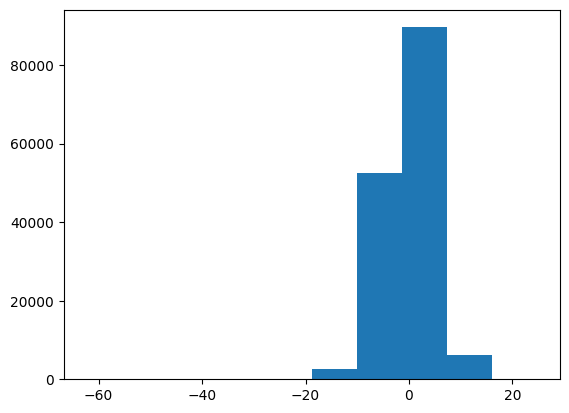

In [4]:
histogram("S10") #Essendo un problema di regressione non direi che il seguente dataset risulta sbilanciato


In [5]:
#boxplot_y()

In [6]:
#all_histograms(X_train)

In [7]:
#density_plots(X_train)


# Pre-processing

In [8]:
#pd.set_option("display.max_columns", None)
#pd.set_option("display.max_rows", None)

In [9]:
#Normalization
def plot_norm(x, x_normalized):
    plt.subplot(2, 1, 1)
    plt.plot(x)
    plt.subplot(2, 1, 2)
    plt.plot(x_normalized)
    plt.show()

def norm(df, column_name, order):
    x = df[column_name]
    x_norm1 = np.linalg.norm(x, ord=order)
    x_normalized = x / x_norm1
    df[column_name] = x_normalized
    #plot_norm(x, x_normalized)
    if order == 1:
        print(sum(x_normalized))
    if order == 2:
        print(sum(x_normalized**2))
    if order == np.inf:
        print(max(x_normalized))

X_train_norm1 = X_train.copy()
X_train_norm2 = X_train.copy()
X_train_normInf = X_train.copy()

In [30]:
#MinMax Scaling
min_max_scaler = preprocessing.MinMaxScaler()
min_max_scaler.fit(X_train)
X_train_minmax = min_max_scaler.transform(X_train)
X_test_minmax = min_max_scaler.transform(X_test)

In [31]:
#Standardization
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modeling

Linear-Regressor

In [32]:
#Linear-Regressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

reg = LinearRegression().fit(X_train, y_train)

predizioni = reg.predict(X_test)

mse = mean_squared_error(y_test, predizioni)
print("Mean Squared Error (MSE):", mse)

r_squared = r2_score(y_test, predizioni)
print("Coefficienti di determinazione R²:", r_squared)

Mean Squared Error (MSE): 84.41033301254126
Coefficienti di determinazione R²: 0.23053951540571493


In [33]:
reg = LinearRegression().fit(X_train_scaled, y_train)

predizioni = reg.predict(X_test_scaled)

mse = mean_squared_error(y_test, predizioni)
print("Mean Squared Error (MSE):", mse)

r_squared = r2_score(y_test, predizioni)
print("Coefficienti di determinazione R²:", r_squared)

Mean Squared Error (MSE): 84.41033301254129
Coefficienti di determinazione R²: 0.2305395154057146


In [34]:
reg = LinearRegression().fit(X_train_minmax, y_train)

predizioni = reg.predict(X_test_minmax)

mse = mean_squared_error(y_test, predizioni)
print("Mean Squared Error (MSE):", mse)

r_squared = r2_score(y_test, predizioni)
print("Coefficienti di determinazione R²:", r_squared)

Mean Squared Error (MSE): 84.41033301254127
Coefficienti di determinazione R²: 0.2305395154057147


Random-Forest-Regressor